Testing additional rows theory: if $t_{ab}=3$ and $t_{bc}=3$, then $t_{ac}$ should equal $6$. If 6 is not a peak on the MI from a to c, then that set of peaks should not be an option.

In [1]:
from WSN import *
import mutual_information as mtin
from scipy.signal import find_peaks
from color import *

In [2]:
mtin.solve_default_fn_equ()

In [9]:
c = 1.6424885622140555
dt = 0.1

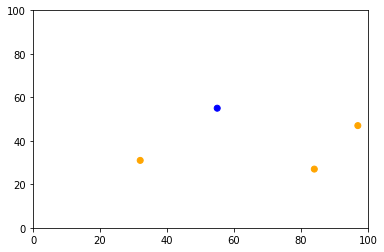

In [13]:
r0, r1, r2, r3 = nodes = np.array([
    [55, 55],
    [32, 31],
    [84, 27],
    [97, 47]
])
plt.scatter(*nodes.T, c=("blue", "orange", "orange", "orange"))
plt.xlim((0, 100))
plt.ylim((0, 100))
plt.show()

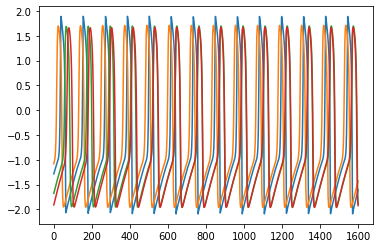

In [6]:
sig0, sig1, sig2, sig3 = sigs = np.array([
    mtin.default_fn_sol[400:, 0, node[1], node[0]]
    for node in nodes
])
[plt.plot(sig) for sig in sigs]
plt.show()

[-27.2 -15.6  -4.    7.6  19.3  30.9] -4.304290834618345


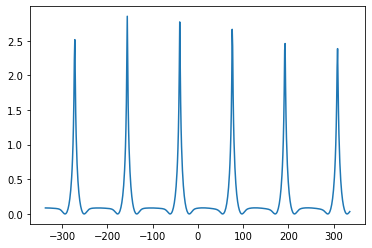

[-38.8 -27.2 -15.6  -4.1   7.5  19.1  30.7  42.3] -5.7921720701971795


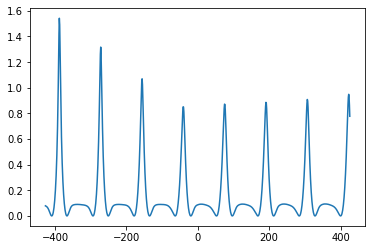

[-11.6  -0.1  11.5] -1.4878812355788342


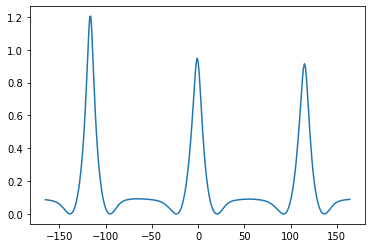

In [22]:

for i, j in (
    (1, 2),
    (1, 3),
    (2, 3)
):
    ri, rj = nodes[[i, j]]
    sigi, sigj = sigs[[i, j]]
    max_delay = dist(ri, rj) / c
    max_tau = int(max_delay / dt) + 20
    shifts = np.arange(-max_tau, max_tau, 1)
    mis = mtin.mi_shift(np.transpose([sigi, sigj]), shifts)
    inclusion_factor = 0.5
    peaks, _ = find_peaks(mis, height=max(mis) * inclusion_factor)
    true_time_delay = (dist(ri, r0) - dist(rj, r0)) / c
    print(shifts[peaks] * dt, true_time_delay)
    plt.plot(shifts, mis)
    plt.show()

Adding extra rows does not seem like it will help, because it really does only add redundant information while increasing the number of peak combinations--although, those extra, incorrect combinations will probably not perform well.
<br><br>
If we have a guess $t_{ab}$ and $t_{bc}$, then we could iterate through possible peaks to find $t_{ac}$, but we already know that $t_{ac}=t_{ab}+t_{bc}$, and that solution will come up in the peaks for $t_{bc}$, so may as well just calculate it ourselves. It will not always work this way, but it usually will, and I do not see this path being profitable.
<br><br>
We were hoping that MI graphs might disagree with each other when we choose the wrong peaks, which is true but only for the cases we would be adding by introducing more rows.